#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data

In [3]:
bolt_food_data = pd.read_csv("data/google_play_data/en/bolt_food_data.csv")
glovo_data = pd.read_csv("data/google_play_data/en/glovo_data.csv")
grubhub_data = pd.read_csv("data/google_play_data/en/grubhub_data.csv")
uber_eats_data = pd.read_csv("data/google_play_data/en/uber_eats_data.csv")
wolt_data = pd.read_csv("data/google_play_data/en/wolt_data.csv")

In [61]:
print(f"Bolt food: {len(bolt_food_data)} samples")
print(f"Glovo: {len(glovo_data)} samples")
print(f"Grubhub: {len(grubhub_data)} samples")
print(f"Uber eats: {len(uber_eats_data)} samples")
print(f"Wolt: {len(wolt_data)} samples")

Bolt food: 8756 samples
Glovo: 45571 samples
Grubhub: 193030 samples
Uber eats: 880973 samples
Wolt: 18109 samples


In [4]:
df = pd.concat([
    bolt_food_data,
    glovo_data,
    grubhub_data,
    uber_eats_data,
    wolt_data
])

In [3]:
df = pd.read_csv('data/google_play_data/google_play_data_en.csv')

# EDA

In [6]:
df = df[['score', 'content']]

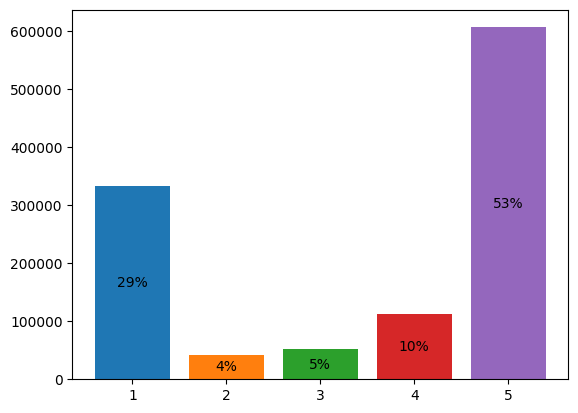

In [16]:
for i in range(1, 6):
    n = len(df[df.score == i])
    plt.bar(i-1, n)
    rate = round(n / len(df) * 100)
    plt.text(i-1, n//2, f"{rate}%", horizontalalignment='center', verticalalignment='center')
plt.xticks(np.arange(5), np.arange(1, 6))
plt.show()

# Data preprocessing

#### Nan values

In [8]:
df.isna().sum()

score        0
content    331
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isna().sum()

score      0
content    0
dtype: int64

#### Duplicates

In [16]:
df.duplicated().sum()

299398

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Remove non-english comments

Source:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://gist.github.com/bfeldman89/fb25ddb63bdaa6de6ab7ac946acde96f">List of emojis</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://github.com/CNurt/Chinese-character-lists/blob/master/CharLists.py">Chinese alphabet</a>

In [7]:
uniqueCharacters = set()
for comment in df['content']:
    uniqueCharacters.update(set(list(comment)))

In [165]:
len(uniqueCharacters)

3997

Emojis

In [8]:
emojis = pd.read_csv('data/characters/emojis.csv')
own_emojis = pd.read_csv("data/characters/own_emojis.csv")
emojis = list(set(emojis.Emoji))
own_emojis = list(set(own_emojis.Emoji))
emojis = emojis + own_emojis
emojis[:10]

['💼', '↙', '⏰', '🇸🇷', '🍖', '🔴', '🇳🇵', '🇻🇪', '🇬🇶', '😩']

Latin Alphabet

In [9]:
latinAlphabet = list(map(chr, range(65, 91)))
latinAlphabet = latinAlphabet + [char.lower() for char in latinAlphabet]

Numbers

In [10]:
numbers = list(map(str, range(0, 10)))

Other Characters

In [11]:
specialSymbols = set("!@#$%^&*()-_=+`~[]{}\|;:'\",.<>/?") + [' ']

In [12]:
other = uniqueCharacters\
    .difference(latinAlphabet)\
    .difference(emojis)\
    .difference(specialSymbols)\
    .difference(numbers)

other = '|'.join(other)

df_new = df[~df.content.str.contains(other)]

In [17]:
len(df_new)

805681

#### Split to train and test data sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_new['content'], df_new['score'], test_size=0.1, random_state=42)

#### Vectorization

Source: <a href="https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c">Towards data science</a>

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS = list(ENGLISH_STOP_WORDS)

vect = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, max_features=10000).fit(X_train)

X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

In [20]:
len(vect.get_feature_names_out())

10000

# Model

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train_vectorized, y_train)

LogisticRegression()

In [25]:
y_pred = logReg.predict(X_test_vectorized)
y_pred

array([5, 5, 5, ..., 5, 1, 5], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7535900904814506

#### Decision forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest =  RandomForestClassifier(max_depth=10)
forest.fit(X_train_vectorized, y_train)

In [18]:
y_pred = forest.predict(X_test_vectorized)
accuracy_score(y_test, y_pred)

0.6361131452543782